# 基底関数と正則化

## 5.2 区分的多項式とスプライン

In [2]:
%matplotlib inline
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP' #全体のフォントを設定

# Limits
x0, xi0, xi1, x1 = -1, 1.5, 4.5, 7
y0, y1 = 0, 4

# Sine line
xgrid = scipy.linspace(x0, x1, 100)
ygrid = scipy.cos(xgrid)+2

# Random sample
size_sample = 60
err_sample = scipy.randn(size_sample)*.3
x_sample = scipy.linspace(x0, x1, size_sample)
y_sample = scipy.cos(x_sample)+2+err_sample

Text(0.5,1,'区分的3次多項式')

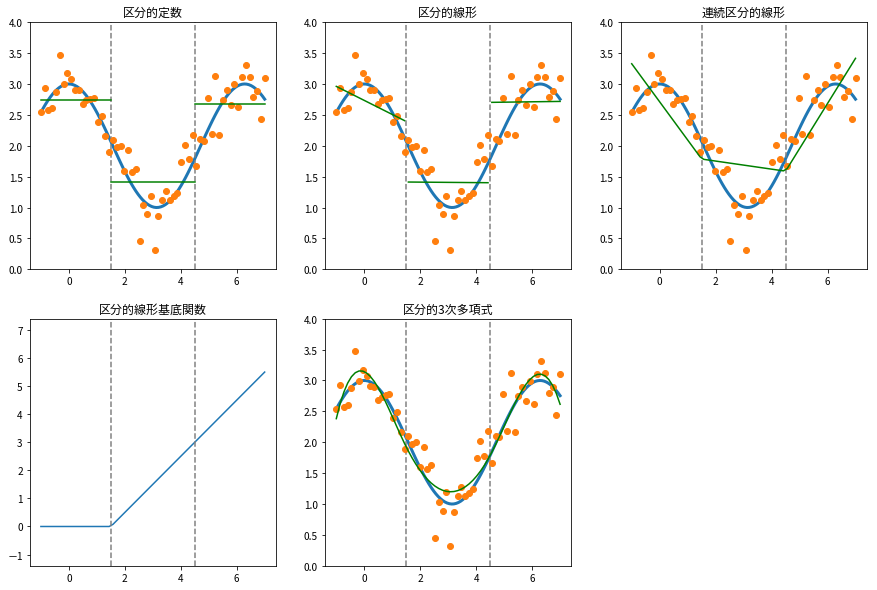

In [18]:
fig51 = plt.figure(51, figsize=(15, 10))
ax1 = fig51.add_subplot(2, 3, 1)
ax1.plot(xgrid, ygrid, linewidth=3)
ax1.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax1.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax1.set_ylim(y0, y1)
ax1.plot(x_sample, y_sample, 'o')

# Split
mask_split1 = x_sample < xi0
mask_split2 = scipy.all([x_sample >= xi0, x_sample < xi1], axis=0)
mask_split3 = xi1 <= x_sample
x_split1 = x_sample[mask_split1]
x_split2 = x_sample[mask_split2]
x_split3 = x_sample[mask_split3]
y_split1 = y_sample[mask_split1]
y_split2 = y_sample[mask_split2]
y_split3 = y_sample[mask_split3]

# 区分的定数
y_split1_mean = y_split1.mean()
y_split2_mean = y_split2.mean()
y_split3_mean = y_split3.mean()
ax1.plot([x0, xi0], [y_split1_mean, y_split1_mean], color='g')
ax1.plot([xi0, xi1], [y_split2_mean, y_split2_mean], color='g')
ax1.plot([xi1, x1], [y_split3_mean, y_split3_mean], color='g')
ax1.set_title(u'区分的定数')

# 区分的線形
y_split1_centered = y_split1-y_split1_mean
y_split2_centered = y_split2-y_split2_mean
y_split3_centered = y_split3-y_split3_mean

beta_split1 = y_split1_centered.dot(x_split1)/(x_split1*x_split1).sum()
beta_split2 = y_split2_centered.dot(x_split2)/(x_split2*x_split2).sum()
beta_split3 = y_split3_centered.dot(x_split3)/(x_split3*x_split3).sum()

y_split1_hat = beta_split1*x_split1+y_split1_mean
y_split2_hat = beta_split2*x_split2+y_split2_mean
y_split3_hat = beta_split3*x_split3+y_split3_mean

ax2 = fig51.add_subplot(2, 3, 2)
ax2.plot(xgrid, ygrid, linewidth=3)
ax2.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax2.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax2.set_ylim(y0, y1)
ax2.plot(x_sample, y_sample, 'o')

ax2.plot(x_split1, y_split1_hat, color='g')
ax2.plot(x_split2, y_split2_hat, color='g')
ax2.plot(x_split3, y_split3_hat, color='g')
ax2.set_title(u'区分的線形')

# 連続区分的線形
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.where(x_sample < xi0, 0, x_sample-xi0)
h4 = scipy.where(x_sample < xi1, 0, x_sample-xi1)
H = scipy.vstack((h1, h2, h3, h4)).T

# 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat = H @ beta

ax3 = fig51.add_subplot(2, 3, 3)
ax3.plot(xgrid, ygrid, linewidth=3)
ax3.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax3.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax3.set_ylim(y0, y1)
ax3.plot(x_sample, y_sample, 'o')
ax3.plot(x_sample, y_hat, color='g')
ax3.set_title(u'連続区分的線形')

ax4 = fig51.add_subplot(2, 3, 4)
ax4.plot(x_sample, h3)
ax4.plot([xi0, xi0], ax4.get_xlim(), '--', color='gray')
ax4.plot([xi1, xi1], ax4.get_xlim(), '--', color='gray')
ax4.set_ylim(ax4.get_xlim())
ax4.set_title(u'区分的線形基底関数')

# 3次スプライン
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.copy(x_sample*x_sample)
h4 = scipy.copy(x_sample*x_sample*x_sample)
h5 = scipy.where(x_sample < xi0, 0, (x_sample-xi0)**3)
h6 = scipy.where(x_sample < xi1, 0, (x_sample-xi1)**3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

## 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat_2 = H @ beta

ax3 = fig51.add_subplot(2, 3, 5)
ax3.plot(xgrid, ygrid, linewidth=3)
ax3.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax3.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax3.set_ylim(y0, y1)
ax3.plot(x_sample, y_sample, 'o')
ax3.plot(x_sample, y_hat_2, color='g')
ax3.set_title(u'区分的3次多項式')

### 5.2.1 3次自然スプライン 

In [10]:
x_sample

array([-1.        , -0.86440678, -0.72881356, -0.59322034, -0.45762712,
       -0.3220339 , -0.18644068, -0.05084746,  0.08474576,  0.22033898,
        0.3559322 ,  0.49152542,  0.62711864,  0.76271186,  0.89830508,
        1.03389831,  1.16949153,  1.30508475,  1.44067797,  1.57627119,
        1.71186441,  1.84745763,  1.98305085,  2.11864407,  2.25423729,
        2.38983051,  2.52542373,  2.66101695,  2.79661017,  2.93220339,
        3.06779661,  3.20338983,  3.33898305,  3.47457627,  3.61016949,
        3.74576271,  3.88135593,  4.01694915,  4.15254237,  4.28813559,
        4.42372881,  4.55932203,  4.69491525,  4.83050847,  4.96610169,
        5.10169492,  5.23728814,  5.37288136,  5.50847458,  5.6440678 ,
        5.77966102,  5.91525424,  6.05084746,  6.18644068,  6.3220339 ,
        6.45762712,  6.59322034,  6.72881356,  6.86440678,  7.        ])

In [13]:
x_sample*x_sample

array([  1.00000000e+00,   7.47199081e-01,   5.31169204e-01,
         3.51910371e-01,   2.09422580e-01,   1.03705832e-01,
         3.47601264e-02,   2.58546395e-03,   7.18184430e-03,
         4.85492675e-02,   1.26687733e-01,   2.41597242e-01,
         3.93277794e-01,   5.81729388e-01,   8.06952025e-01,
         1.06894571e+00,   1.36771043e+00,   1.70324619e+00,
         2.07555300e+00,   2.48463085e+00,   2.93047975e+00,
         3.41309968e+00,   3.93249066e+00,   4.48865269e+00,
         5.08158575e+00,   5.71128986e+00,   6.37776501e+00,
         7.08101120e+00,   7.82102844e+00,   8.59781672e+00,
         9.41137604e+00,   1.02617064e+01,   1.11488078e+01,
         1.20726803e+01,   1.30333238e+01,   1.40307383e+01,
         1.50649239e+01,   1.61358805e+01,   1.72436082e+01,
         1.83881069e+01,   1.95693766e+01,   2.07874174e+01,
         2.20422292e+01,   2.33338121e+01,   2.46621660e+01,
         2.60272910e+01,   2.74291870e+01,   2.88678541e+01,
         3.03432922e+01,

In [15]:
(x_sample-xi0)**3

array([ -1.56250000e+01,  -1.32180256e+01,  -1.10718763e+01,
        -9.17159435e+00,  -7.50222211e+00,  -6.04880185e+00,
        -4.79637585e+00,  -3.72998639e+00,  -2.83467577e+00,
        -2.09548627e+00,  -1.49746018e+00,  -1.02563979e+00,
        -6.65067388e-01,  -4.00785256e-01,  -2.17835684e-01,
        -1.01260961e-01,  -3.61033747e-02,  -7.40521183e-03,
        -2.08760389e-04,   4.43691906e-04,   9.50985739e-03,
         4.19474484e-02,   1.12714177e-01,   2.36767756e-01,
         4.29065898e-01,   7.04566314e-01,   1.07822672e+00,
         1.56500482e+00,   2.17985834e+00,   2.93774497e+00,
         3.85362245e+00,   4.94244847e+00,   6.21918076e+00,
         7.69877702e+00,   9.39619496e+00,   1.13263923e+01,
         1.35043268e+01,   1.59449560e+01,   1.86632378e+01,
         2.16741299e+01,   2.49925899e+01,   2.86335756e+01,
         3.26120447e+01,   3.69429549e+01,   4.16412638e+01,
         4.67219293e+01,   5.21999091e+01,   5.80901608e+01,
         6.44076421e+01,